In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
import scipy
import scipy.integrate

pi = np.pi

# Since we're using a weird way to calculate the variance, need to define a new variance function
def getVariance(x, mu):
    ''' 
    x is the measurement, mu is the mean/'correct' value
    (x & mu are assumed to be the same length)
    returns total variance
    '''
    if (len(x) != len(mu)):
        print("*** NOTE: VARIANCE CALCULATED WITH DIFFERENT LENGTH VECTORS ***")
        print("Len of x:", len(x), "; len of mu:", len(mu))
    
    return ( np.sum( (x-mu)**2 )/(len(mu) - 1) )

# create file names and open file data
runNumber = '1'
carNumber = '3'

viconFileName = 'VICON_Data-Run_' + runNumber + '-Car_Number_' + carNumber + '.txt'
sensorFileName = 'Sensor_Data-Run_' + runNumber + '-Car_Number_' + carNumber + '.txt'
waypointFileName = 'Waypoint_Data-Run_' + runNumber + '-Car_Number_' + carNumber +'.txt'

viconData = np.genfromtxt(viconFileName, skip_header=1)
sensorData = np.genfromtxt(sensorFileName, skip_header=1)
waypointData = np.genfromtxt(waypointFileName, skip_header=1)

In [2]:
# Take data and divide it into pieces
# Vicon data
viconT = viconData[:,0]
viconX = viconData[:,1]
viconY = viconData[:,2]
viconTheta = viconData[:,3]
viconTheta_dot = viconData[:,4]
viconSpeed = viconData[:,5]

# The x, y, & z axes are probably weirdly aligned with the vicon x & y so thats why there's a weird name here
# Sensor Data
sensorT = sensorData[:,0]
sensorVHead = sensorData[:,1]
sensorAxs = sensorData[:,2]
sensorAys = sensorData[:,3]
sensorAzs = sensorData[:,4]
sensorMxs = sensorData[:,5]
sensorMys = sensorData[:,6]
sensorMzs = sensorData[:,7]
sensorGxs = sensorData[:,8]
sensorGys = sensorData[:,9]
sensorGzs = sensorData[:,10]

# Waypoint (Desired) Data
waypointT = waypointData[:,0] # NOTE: THIS IS JUST THE TIME THE POINT WAS EVALUATED
waypointX = waypointData[:,1]
waypointY = waypointData[:,2]
waypointVhead = waypointData[:,3]
waypointVlat = waypointData[:,4]
waypointTheta = waypointData[:,5]
waypointTheta_dot = waypointData[:,6]

# Move the starting times to 0
viconT = viconT - viconT[0]
sensorT = sensorT - sensorT[0]
waypointT = waypointT - waypointT[0]

startTime = 0

In [3]:
# Trim out the bad data
viconX = viconX[viconT > startTime]
viconY = viconY[viconT > startTime]
viconTheta = viconTheta[viconT > startTime]
viconTheta_dot = viconTheta_dot[viconT > startTime]
viconSpeed = viconSpeed[viconT > startTime]
viconT = viconT[viconT > startTime]

sensorVHead = sensorVHead[sensorT > startTime]
sensorAxs = sensorAxs[sensorT > startTime]
sensorAys = sensorAys[sensorT > startTime]
sensorAzs = sensorAzs[sensorT > startTime]
sensorMxs = sensorMxs[sensorT > startTime]
sensorMys = sensorMys[sensorT > startTime]
sensorMzs = sensorMzs[sensorT > startTime]
sensorGxs = sensorGxs[sensorT > startTime]
sensorGys = sensorGys[sensorT > startTime]
sensorGzs = sensorGzs[sensorT > startTime]
sensorT = sensorT[sensorT > startTime]

waypointX = waypointX[waypointT > startTime]
waypointY = waypointY[waypointT > startTime]
waypointVhead = waypointVhead[waypointT > startTime]
waypointVlat = waypointVlat[waypointT > startTime]
waypointTheta = waypointTheta[waypointT > startTime]
waypointTheta_dot = waypointTheta_dot[waypointT > startTime]
waypointT = waypointT[waypointT > startTime]

# Sensor data unit conversion factors (time doesn't get scaled)
kVHead = 1.0
kAccel = 9.81/16384    # puts acceleration in m/s^2
kMag = 1.0             # apparently calibrating this isn't so straightforward 
kGyro = (pi/2)/10285   # puts gyro (ang vel) in rad/s

# Update sensor data to the right units
sensorVHead *= kVHead
sensorAxs *= kAccel
sensorAys *= kAccel
sensorAzs *= kAccel
sensorMxs *= kMag
sensorMys *= kMag
sensorMzs *= kMag
sensorGxs *= kGyro
sensorGys *= kGyro
sensorGzs *= kGyro

''' The important X is X = [ x, y, v^H, v^L, theta, theta_dot ] and we are not paying attention to the measurements of x & y ''';

# Edit waypoint theta_dot because it has a delta function in it


# Remove biases from Ax, Ay, & Az


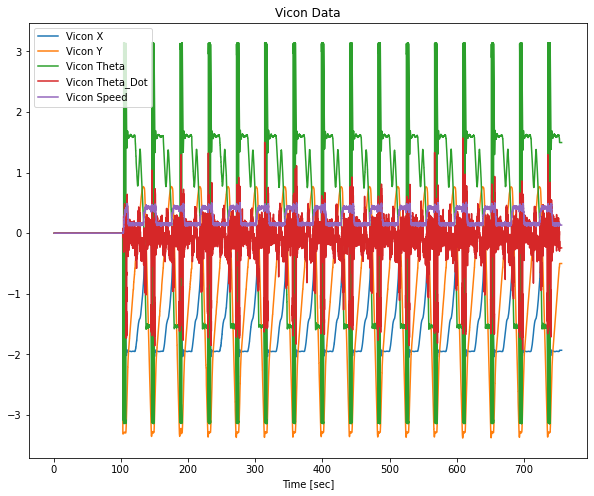

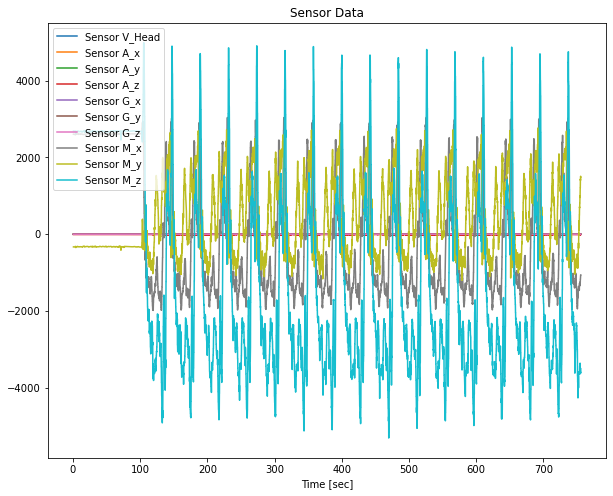

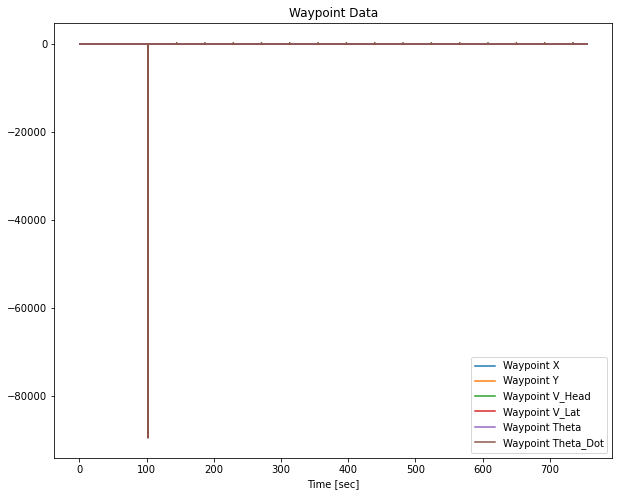

In [4]:
# Plot data to see what's necessary
# Vicon Data
plt.plot(viconT, viconX, label = 'Vicon X')
plt.plot(viconT, viconY, label = 'Vicon Y')
plt.plot(viconT, viconTheta, label = 'Vicon Theta')
plt.plot(viconT, viconTheta_dot, label = 'Vicon Theta_Dot')
plt.plot(viconT, viconSpeed, label = 'Vicon Speed')
plt.xlabel('Time [sec]'); plt.title('Vicon Data'); plt.legend(); plt.figure();

# Sensor Data
plt.plot(sensorT, sensorVHead, label = 'Sensor V_Head') # This is the only non-constant signal
plt.plot(sensorT, sensorAxs, label = 'Sensor A_x')
plt.plot(sensorT, sensorAys, label = 'Sensor A_y')
plt.plot(sensorT, sensorAzs, label = 'Sensor A_z')
plt.plot(sensorT, sensorGxs, label = 'Sensor G_x')
plt.plot(sensorT, sensorGys, label = 'Sensor G_y')
plt.plot(sensorT, sensorGzs, label = 'Sensor G_z')
plt.plot(sensorT, sensorMxs, label = 'Sensor M_x')
plt.plot(sensorT, sensorMys, label = 'Sensor M_y')
plt.plot(sensorT, sensorMzs, label = 'Sensor M_z')
plt.xlabel('Time [sec]'); plt.title('Sensor Data'); plt.legend(); plt.figure();

# Waypoint Data
plt.plot(waypointT, waypointX, label = 'Waypoint X')
plt.plot(waypointT, waypointY, label = 'Waypoint Y')
plt.plot(waypointT, waypointVhead, label = 'Waypoint V_Head')
plt.plot(waypointT, waypointVlat, label = 'Waypoint V_Lat')
plt.plot(waypointT, waypointTheta, label = 'Waypoint Theta')
plt.plot(waypointT, waypointTheta_dot, label = 'Waypoint Theta_Dot')
plt.xlabel('Time [sec]'); plt.title('Waypoint Data'); plt.legend();

In [5]:
# remove all unnecessary variables to save memory
del viconData, sensorData, waypointData # the full tables of data
# Figure out which A's, M's, and G's we need to keep and delete the others



<Figure size 720x576 with 0 Axes>

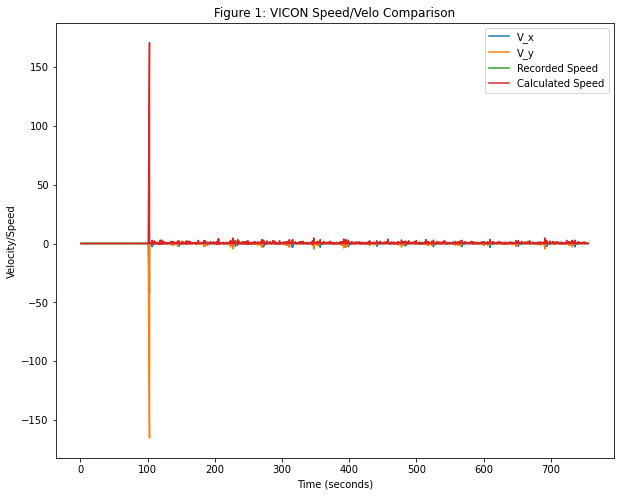

<Figure size 720x576 with 0 Axes>

In [6]:
# Calculate the x and y velocities from VICON
viconVx = np.zeros_like(viconT[:-1])
viconVy = np.zeros_like(viconT[:-1])

viconDeltaX = viconX[1:] - viconX[:-1]
viconDeltaY = viconY[1:] - viconY[:-1]
viconDeltaT = viconT[1:] - viconT[:-1]

for i in range(len(viconVx)):
    viconVx[i] = viconDeltaX[i]/viconDeltaT[i]
    viconVy[i] = viconDeltaY[i]/viconDeltaT[i]

# Calc Heading Velocity
viconHeadingVector = np.array([np.cos(viconTheta), np.sin(viconTheta)])
viconHeadingVector = viconHeadingVector.transpose()
viconVeloVector = np.array([viconVx, viconVy])
viconVHead = np.dot(viconHeadingVector[:-1], viconVeloVector)
  
# For a sanity check plot against the recorded speed graph
plt.plot(viconT[:-1], viconVx, label = 'V_x')
plt.plot(viconT[:-1], viconVy, label = 'V_y')
plt.plot(viconT, np.abs(viconSpeed), label = 'Recorded Speed')
plt.plot(viconT[:-1], np.sqrt(viconVx**2 + viconVy**2), label = 'Calculated Speed')
plt.xlabel('Time (seconds)'); plt.ylabel('Velocity/Speed'); plt.title('Figure 1: VICON Speed/Velo Comparison')
plt.legend(); plt.figure()

<Figure size 720x576 with 0 Axes>

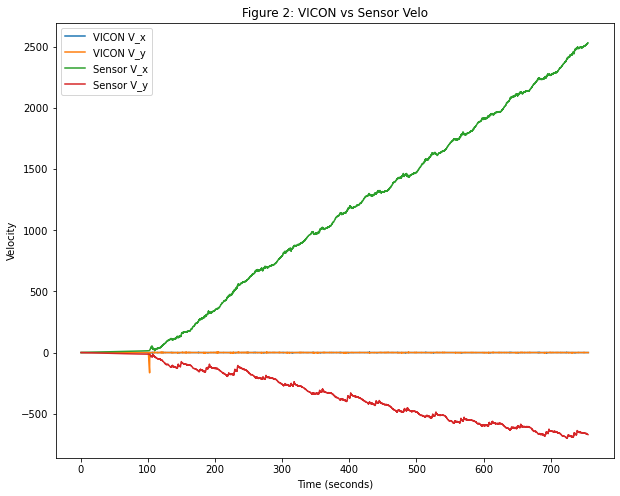

<Figure size 720x576 with 0 Axes>

In [7]:
# initialize the sensor acceleration velocity vectors
sensorVxs = np.zeros_like(sensorT[:-1])
sensorVys = np.zeros_like(sensorT[:-1])
sensorVzs = np.zeros_like(sensorT[:-1])

# integrate the acceleration data cumulatively to find the velocity in each direction
sensorVxs = scipy.integrate.cumtrapz(sensorAxs)
sensorVys = scipy.integrate.cumtrapz(sensorAys)
sensorVzs = scipy.integrate.cumtrapz(sensorAzs) #should (hopefully) stay around zero and be ignored eventually

# plot to compare velo's
plt.plot(viconT[:-1], viconVx, label = 'VICON V_x')
plt.plot(viconT[:-1], viconVy, label = 'VICON V_y')
plt.plot(sensorT[:-1], sensorVxs, label = 'Sensor V_x')
plt.plot(sensorT[:-1], sensorVys, label = 'Sensor V_y')
# plt.plot(sensorT[:-1], sensorVzs, label = 'Sensor V_z')
plt.xlabel('Time (seconds)'); plt.ylabel('Velocity'); plt.title('Figure 2: VICON vs Sensor Velo')
plt.legend(); plt.figure()

In [8]:
'''# plot to compare speeds
plt.plot(viconT, viconSpeed, label = 'VICON Speed')
plt.plot(viconT[:-1], np.sqrt(viconVx**2 + viconVy**2), label = 'VICON Calculated Speed')
plt.plot(viconT[:-1], viconVHead, label = 'VICON Heading Velocity')
plt.plot(sensorT[:-1], np.sqrt(sensorVxs**2 + sensorVys**2 + sensorVzs**2), label = 'Sensor Calculated Speed')
plt.plot(sensorT, sensorVHead, label = 'Encoder Speed')
plt.xlabel('Time (seconds)'); plt.ylabel('Speed'); plt.title('Figure 3: VICON vs Sensor Speed & Heading Velo')
plt.legend(); plt.figure()''';

In [9]:
# TODO - FIGURE OUT IF THE ACCELERATIONS OUTPUT INTRINSICALLY OR EXTRINSICALLY

# Initialize variance variables
varVHead = 0.0
varVLat = 0.0
varTheta = 0.0
varTheta_dot = 0.0

In [10]:
# calculate variances




# Fin

[102.25999999 136.0999999  144.88000011 178.00999999 186.78999996
 220.16000009 229.02999997 233.5        262.12000012 270.95000005
 304.06999993 312.92000008 346.44000006 355.26999998 388.48000002
 396.93000007 397.30999994 430.5999999  439.49000001 472.76999998
 481.5999999  514.94000006 523.75999999 556.98000002 565.45000005
 565.81999993 599.08999991 607.98000002 641.27999997 650.25
 683.50999999 692.3499999  725.56999993 734.47000003]
209.6100001335144
5324


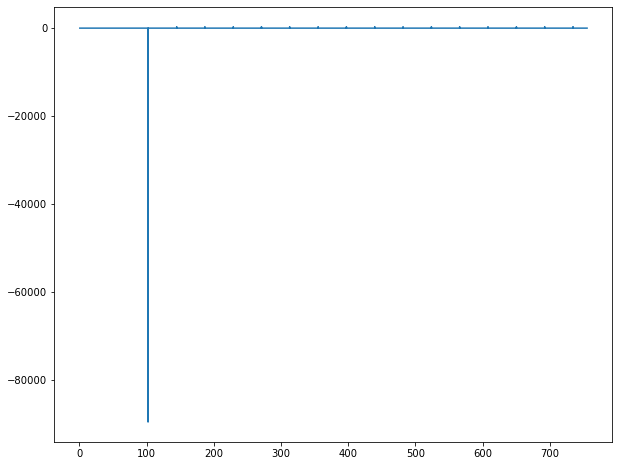

In [11]:
plt.plot(waypointT, waypointTheta_dot);
print(waypointT[np.abs(waypointTheta_dot) > 2*pi])
i = 0
while (waypointT[i] < 209.59):
    i += 1;
print(waypointT[i]); print(i)

In [12]:
print(waypointT[i-1])
print(waypointTheta[i-1])
print(waypointTheta[i])
d = ( waypointTheta[i] - waypointTheta[i-1] )/( waypointT[i] - waypointT[i-1] )
print(d)
print(waypointTheta_dot[i])
# Okay so this is odd what do I do with the delta functions?
# if over 2pi then replace with ΔΘ/Δt (calculated)

209.5899999141693
1.01681186883
1.02424540023
0.3716724937731199
0.338123756745


In [13]:
# Check bias in Ax, Ay, & Az
print('Mean of Ax:', np.mean(sensorAxs), '; Ax[-1]:', sensorAxs[-1])
print('Mean of Ay:', np.mean(sensorAys), '; Ay[-1]:', sensorAys[-1])
print('Mean of Az:', np.mean(sensorAzs), '; Az[-1]:', sensorAzs[-1])
# maybe want to change y... : y=< ax, ay, v_h, omega(, theta ?)> 

Mean of Ax: 0.0778139881607619 ; Ax[-1]: 0.15088623046875002
Mean of Ay: -0.020600401002363815 ; Ay[-1]: -0.0431103515625
Mean of Az: -8.58255822804147 ; Az[-1]: -8.353828125
